[35.51       24.26666667 10.38571429 22.35238095 14.02142857 23.71666667
 19.83421053 15.43571429 20.575      27.45       15.43571429 22.35238095
 22.35238095 18.31666667 17.71111111 23.71666667  8.49285714 16.81428571
 19.83421053 10.38571429 37.73333333 23.71666667 19.83421053 16.81428571
 27.45       19.77142857 19.83421053 22.46428571 31.52857143 22.83333333
 20.575      19.33333333 18.31666667 14.02142857 23.71666667 17.13333333
 20.50714286 22.35238095 10.38571429  8.49285714  8.49285714 18.31666667
 49.78571429 31.76       19.83421053 25.4375     25.4375     42.3
 14.02142857 25.4375     19.83421053 35.51       23.71666667 23.71666667
 50.         31.76       10.38571429 31.52857143 25.4375     22.35238095
 35.51       15.43571429 29.33333333 37.73333333 10.38571429 22.46428571
 35.51       20.50714286 47.36666667 47.36666667 10.95       23.71666667
 14.02142857 19.18333333 23.71666667 10.38571429 41.7        23.71666667
 15.08181818 15.08181818 47.36666667 49.78571429 23.716666

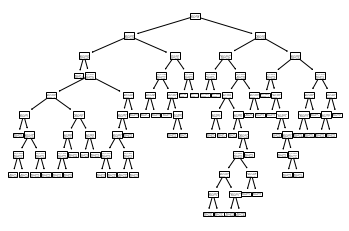

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn import tree

from sklearn.datasets import load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston['MEDV'] = boston_dataset.target
names = boston_dataset.feature_names


#Library CART pada python
from sklearn.tree import DecisionTreeRegressor 

array = boston.values

X = array[:,0:13]
Y = array[:,13]
#print(X)
#print(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#model = DecisionTreeRegressor(max_leaf_nodes = 20)

model = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=50, min_impurity_decrease=0.0, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best')

rt = model.fit(X_train, Y_train)
rt

import random as rnd

rnd.seed(123458)
X_new = X[rnd.randrange(X.shape[0])]
X_new = X_new.reshape(1,13)

YHat = model.predict(X_new)


df = pd.DataFrame(X_new, columns = names)
df["Predicted Price"] = YHat
df.head(1)

from sklearn.metrics import r2_score
YHat = model.predict(X_test)
print(YHat)

r2 = r2_score(Y_test, YHat)
print("R-Squared = ", r2)

tree_representation = tree.plot_tree(rt)
